In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
Auto_sales_path = "csv/2020_US_AUTO_SALES_BY_MODEL.csv"
Auto_industry_path = "csv/US_AUTO_INDUSTRY_SALES.csv"
Auto_manufacturer_path = "csv/US_SALES_BY_MANUFACTURER.csv"
Auto_sale_state_path = "csv/Car_sale_by_state.csv"
USA_cars_path = "csv/USA_cars_datasets.csv"
USA_cars_inventory_path = "csv/Domestic_Auto_Inventories.csv"
Cars_factors_path = "csv/Car_others_factors.csv"


# Read the mouse data and the study results
Auto_sales_df = pd.read_csv(Auto_sales_path)
Auto_industry_df = pd.read_csv(Auto_industry_path)
Auto_manufacturer_df = pd.read_csv(Auto_manufacturer_path)
Auto_sale_state_df = pd.read_csv(Auto_sale_state_path)
USA_cars_df=pd.read_csv(USA_cars_path)
USA_cars_inventory_df=pd.read_csv(USA_cars_inventory_path)
Cars_factors_df=pd.read_csv(Cars_factors_path)



In [2]:
Auto_sales_df.head()

,Brand,Model,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total
0,Acura,ILX,935,1083,723,506,1039,1109,1230,1331,1377,1523,1141,1417,13414
1,Acura,MDX,2961,3843,2137,1725,3331,3977,4494,5165,4920,4732,4491,6040,47816
2,Acura,NSX,9,9,16,5,6,10,15,3,10,22,9,14,128
3,Acura,RDX,3493,4982,2678,1760,4427,5410,5317,5057,4664,5022,4155,5820,52785
4,Acura,RLX,63,84,31,26,71,126,134,118,122,126,81,72,1054


In [3]:
brand_sale=Auto_sales_df.groupby(["Brand"])
brand_sale=pd.DataFrame({
    "Total" : brand_sale["Total"].sum(),
    "Avg" : brand_sale["Total"].mean(),
    "Model_Count" : brand_sale["Total"].count()
})
brand_sale.head(20)

,Total,Avg,Model_Count
Brand,,,
Acura,136982,22830.333333,6
Alfa,18585,6195.000000,3
Audi,186625,14355.769231,13
BMW,280297,16488.058824,17
Buick,162749,23249.857143,7
Cadillac,129495,12949.500000,10
Chevrolet,1730033,91054.368421,19
Chrysler,110285,27571.250000,4
Dodge,267326,38189.428571,7


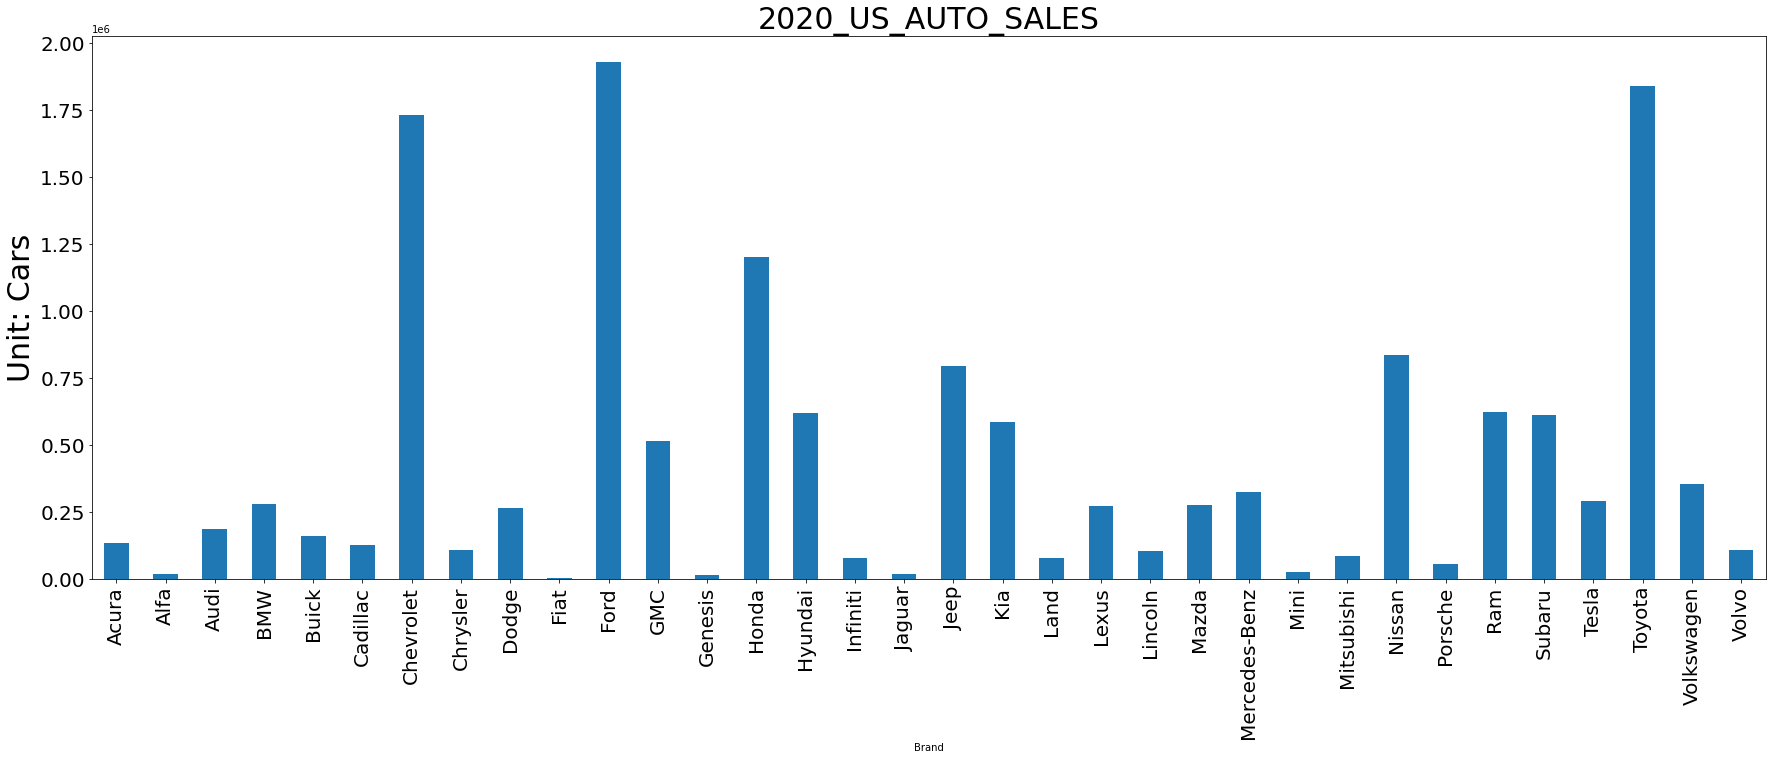

<Figure size 432x288 with 0 Axes>

In [4]:
brand_sale["Total"].plot(kind='bar', figsize=(30,10))
plt.title("2020_US_AUTO_SALES", fontsize=30)
plt.ylabel("Unit: Cars", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()
plt.tight_layout()

In [5]:
Auto_industry_df

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total,Growth Rate YOY
0,2005,1052224,1244753,1564938,1493837,1488171,1671401,1795944,1474130,1321156,1139217,1160447,1475649,16881867,0.000
1,2006,1136538,1253271,1519952,1439311,1478735,1487688,1480504,1478072,1342543,1205973,1188344,1419758,16430689,-0.027
2,2007,1079891,1244375,1528582,1326837,1550609,1433282,1302661,1467601,1305275,1221485,1170035,1377542,16008175,-0.026
3,2008,1036540,1162277,1339158,1237336,1383754,1176765,1126477,1240785,959127,829396,737978,884306,13113899,-0.181
4,2009,650608,681676,847002,822746,919295,850654,991950,1254982,740394,832953,741826,1013629,10347715,-0.211
5,2010,693531,774108,1059134,976345,1096910,978154,1045915,993211,953837,940740,863198,1135333,11510416,0.112
6,2011,815408,987265,1238252,1149240,1052417,1044037,1055231,1067895,1048158,1015016,986664,1236129,12695712,0.103
7,2012,909806,2115420,1398128,1177478,1327521,1276629,1141761,1274193,1183825,1085804,1137862,1347837,15376264,0.211
8,2013,1037967,1185746,1444773,1276318,1434096,1396038,1306885,1494273,1128124,1198989,1236413,1350623,15490245,0.007
9,2014,1006049,1186038,1529348,1381300,1598730,1412565,1427029,1575971,1239405,1275657,1291817,1500108,16424017,0.060


In [6]:
Auto_industry_df.dtypes

Year                 int64
Jan                  int64
Feb                  int64
Mar                  int64
Apr                  int64
May                  int64
Jun                  int64
Jul                  int64
Aug                  int64
Sep                  int64
Oct                  int64
Nov                  int64
Dec                  int64
Total                int64
Growth Rate YOY    float64
dtype: object

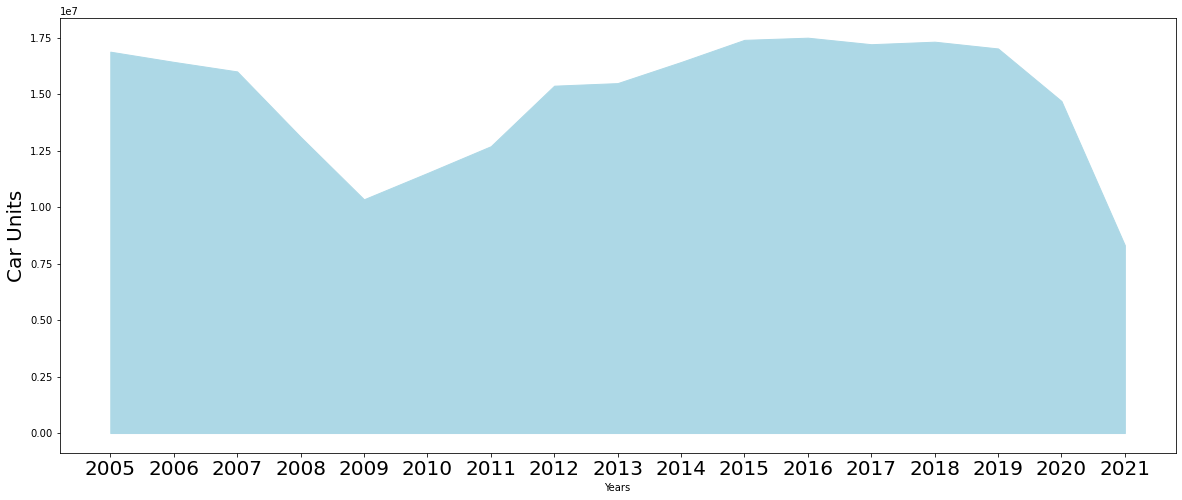

In [7]:
plt.figure(figsize=(20,8))
years=[year for year in Auto_industry_df["Year"]]
plt.fill_between(years, Auto_industry_df["Total"], color='Lightblue')

plt.xlabel("Years", fontsize=10)
plt.ylabel("Car Units", fontsize=20)
plt.xticks(np.arange(min(years), max(years)+1, 1.0), fontsize=20)

plt.show()


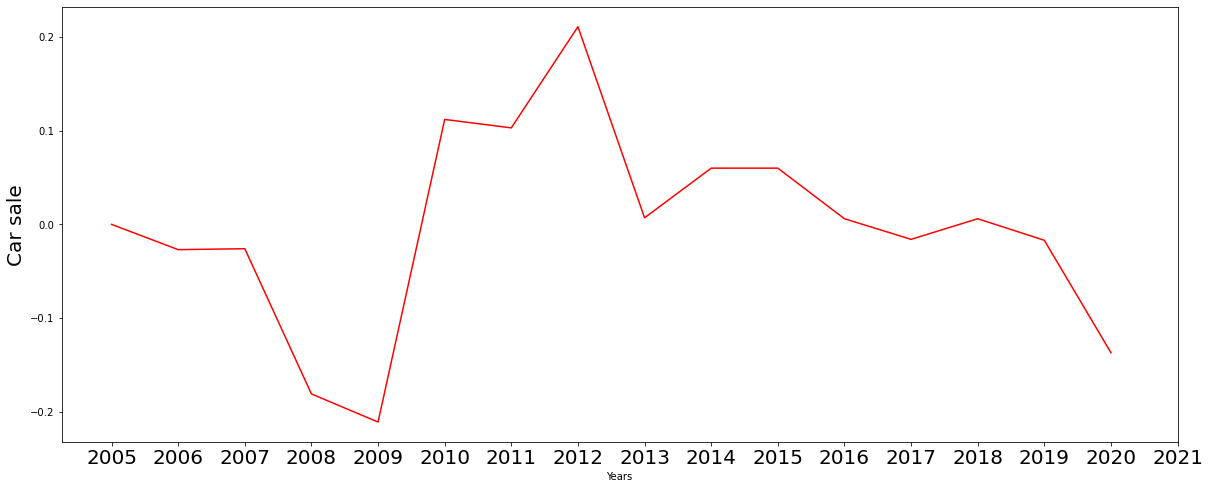

In [8]:
plt.figure(figsize=(20,8))
years=[year for year in Auto_industry_df["Year"]]
plt.plot(years, Auto_industry_df["Growth Rate YOY"], color='r')


plt.xlabel("Years", fontsize=10)
plt.ylabel("Car sale", fontsize=20)
plt.xticks(np.arange(min(years), max(years)+1, 1.0), fontsize=20)

plt.show()

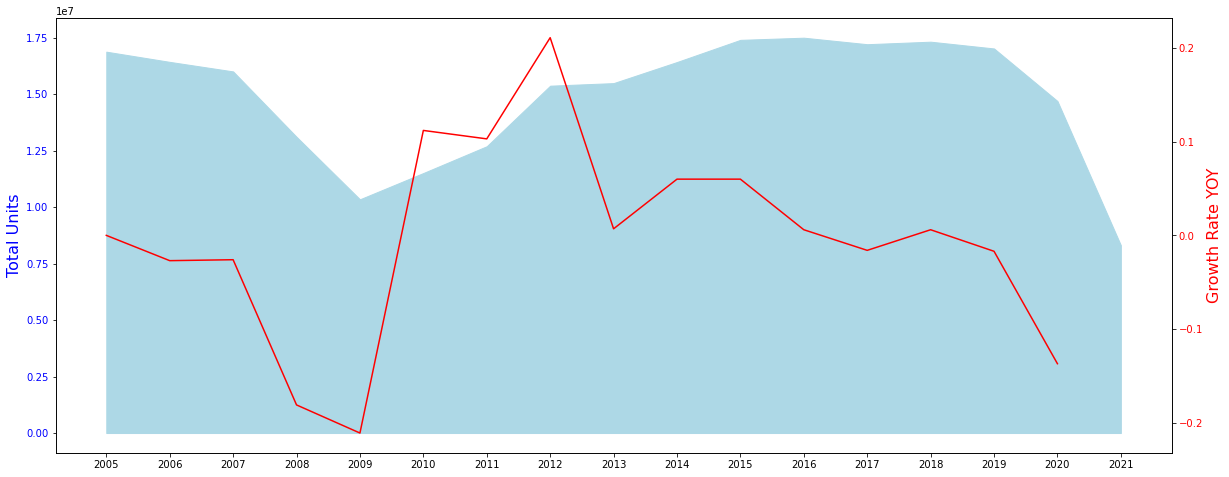

In [9]:
# plt.figure(sharey=False,figsize=(20,8))
# years=[year for year in Auto_industry_df["Year"]]
# plt.plot(years, Auto_industry_df["Growth Rate YOY"], color='r')
# plt.fill_between(years, Auto_industry_df["Total"], color='Lightblue')

# plt.xlabel("Years", fontsize=10)
# plt.xticks(np.arange(min(years), max(years)+1, 1.0), fontsize=20)


# plt.show()
fig, ax1 = plt.subplots(figsize=(20,8))

years=[year for year in Auto_industry_df["Year"]]
ax1.fill_between(years, Auto_industry_df["Total"], color='Lightblue')
ax1.set_ylabel(r"Total Units", fontsize=16, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")

    
ax2 = ax1.twinx()
ax2.plot(years, Auto_industry_df["Growth Rate YOY"], color='r')
ax2.set_ylabel(r"Growth Rate YOY", fontsize=16, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")
    
plt.xticks(np.arange(min(years), max(years)+1, 1.0), fontsize=20)

plt.savefig("Auto_industry.png")
plt.show()

In [10]:
Auto_manufacturer_df.head()

,Manufacturer,Q4_2018,Q1_2019,Q2_2019,Q3_2019,Q4_2019,Q1_2020,Q2_2020,Q3_2020,Q4_2020,Q1_2021,Q2_2021,Unnamed: 12
0,BMW Group,95440,82793,91229,86230,100738,67388,56244,77413,107299,77764,105901,NaN
1,Daimler,98802,78898,80707,89766,103363,75265,69505,84628,95310,90032,92441,NaN
2,Ford Motor Company,606569,582758,639039,576007,598728,514613,432315,549085,538587,518681,472259,NaN
3,General Motors,784422,665182,733697,737279,734007,612440,490958,664016,770176,696226,674388,NaN
4,Honda Motor Company,397831,369787,407408,429214,401961,298784,293502,378433,366068,347091,486419,NaN


In [11]:
Auto_manufacturer=Auto_manufacturer_df.drop(columns=['Unnamed: 12'])
Auto_manufacturer.set_index("Manufacturer")
Auto_manufacturer.head()

,Manufacturer,Q4_2018,Q1_2019,Q2_2019,Q3_2019,Q4_2019,Q1_2020,Q2_2020,Q3_2020,Q4_2020,Q1_2021,Q2_2021
0,BMW Group,95440,82793,91229,86230,100738,67388,56244,77413,107299,77764,105901
1,Daimler,98802,78898,80707,89766,103363,75265,69505,84628,95310,90032,92441
2,Ford Motor Company,606569,582758,639039,576007,598728,514613,432315,549085,538587,518681,472259
3,General Motors,784422,665182,733697,737279,734007,612440,490958,664016,770176,696226,674388
4,Honda Motor Company,397831,369787,407408,429214,401961,298784,293502,378433,366068,347091,486419


In [12]:
Auto_manufacturer_index=Auto_manufacturer.set_index("Manufacturer")
Auto_manufacturer_index

,Q4_2018,Q1_2019,Q2_2019,Q3_2019,Q4_2019,Q1_2020,Q2_2020,Q3_2020,Q4_2020,Q1_2021,Q2_2021
Manufacturer,,,,,,,,,,,
BMW Group,95440,82793,91229,86230,100738,67388,56244,77413,107299,77764,105901
Daimler,98802,78898,80707,89766,103363,75265,69505,84628,95310,90032,92441
Ford Motor Company,606569,582758,639039,576007,598728,514613,432315,549085,538587,518681,472259
General Motors,784422,665182,733697,737279,734007,612440,490958,664016,770176,696226,674388
Honda Motor Company,397831,369787,407408,429214,401961,298784,293502,378433,366068,347091,486419
Hyundai Kia Auto Group,324998,288384,359796,336684,339757,272775,268265,339586,341688,344472,454920
Jaguar Land Rover,36317,35250,27155,26666,36670,29202,18820,20599,33198,25067,22137
Mazda,65203,70831,67722,69612,70385,67670,61199,74411,75796,78794,105909
Nissan Motor Co,393871,407921,380215,351828,326766,293167,189611,263979,257894,313783,323297


In [14]:
Manufacturer_id=str(input("Which Manufacturer are you lookinf for?"))

Which Manufacturer are you lookinf for?Tesla


In [15]:
car_index = Auto_manufacturer.loc[Auto_manufacturer["Manufacturer"] == Manufacturer_id]
pick_car_df=car_index.set_index("Manufacturer")
pick_car_df

,Q4_2018,Q1_2019,Q2_2019,Q3_2019,Q4_2019,Q1_2020,Q2_2020,Q3_2020,Q4_2020,Q1_2021,Q2_2021
Manufacturer,,,,,,,,,,,
Tesla,77525,30600,53300,54700,56525,52800,36800,139300,64002,66000,73301


<Figure size 7200x7200 with 0 Axes>

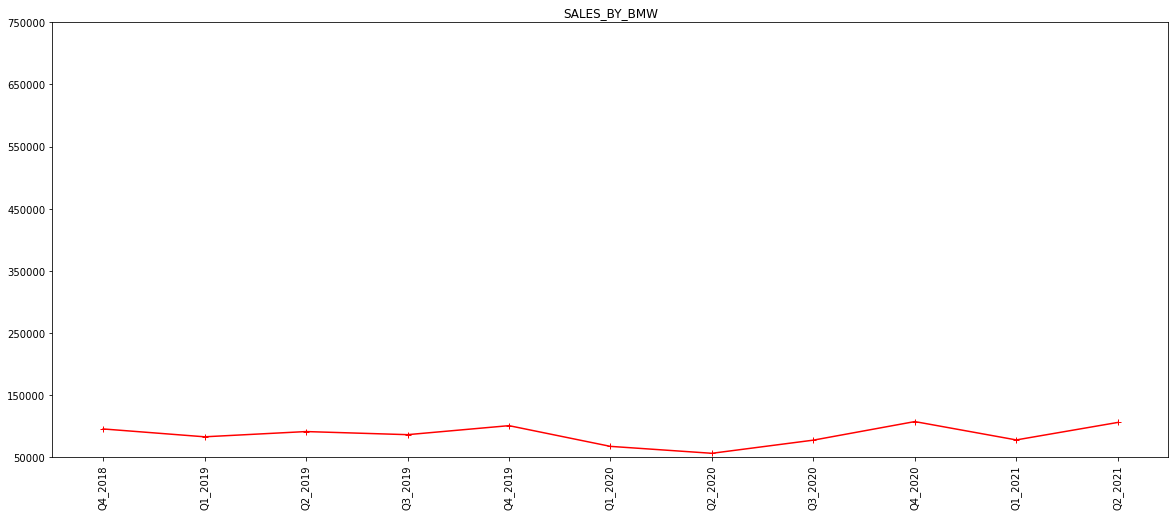

<Figure size 7200x7200 with 0 Axes>

In [16]:
fig = plt.figure(figsize=(20,8))
x_axis=np.arange(len(Auto_manufacturer_index.columns))
BMW_axis=Auto_manufacturer_index.iloc[0].tolist()
plt.plot(x_axis, BMW_axis, marker="+", color="red")

tick_locations=[value for value in x_axis]
plt.xticks(tick_locations, ["Q4_2018","Q1_2019", "Q2_2019", "Q3_2019", "Q4_2019", "Q1_2020",
                           "Q2_2020", "Q3_2020", "Q4_2020", "Q1_2021", "Q2_2021"] , rotation='vertical')


plt.yticks(np.arange(50000,800000, step=100000))
plt.title(f"SALES_BY_BMW")


plt.figure(figsize=(100, 100))

<Figure size 7200x7200 with 0 Axes>

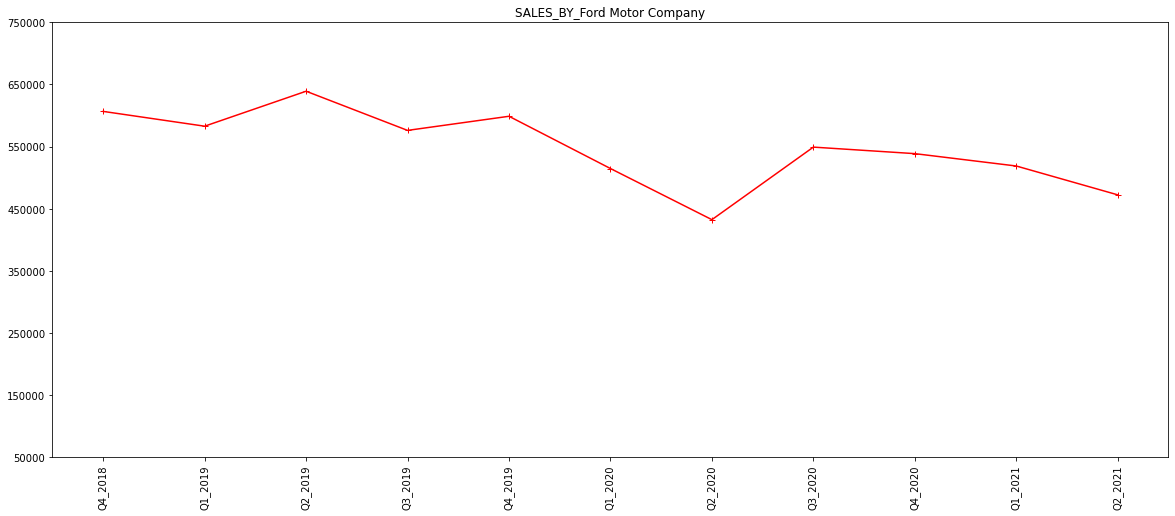

<Figure size 7200x7200 with 0 Axes>

In [17]:
fig = plt.figure(figsize=(20,8))
x_axis=np.arange(len(Auto_manufacturer_index.columns))
Ford_axis=Auto_manufacturer_index.iloc[2].tolist()
plt.plot(x_axis, Ford_axis, marker="+", color="red")

tick_locations=[value for value in x_axis]
plt.xticks(tick_locations, ["Q4_2018","Q1_2019", "Q2_2019", "Q3_2019", "Q4_2019", "Q1_2020",
                           "Q2_2020", "Q3_2020", "Q4_2020", "Q1_2021", "Q2_2021"] , rotation='vertical')


plt.yticks(np.arange(50000,800000, step=100000))
plt.title(f"SALES_BY_Ford Motor Company")


plt.figure(figsize=(100, 100))

<Figure size 7200x7200 with 0 Axes>

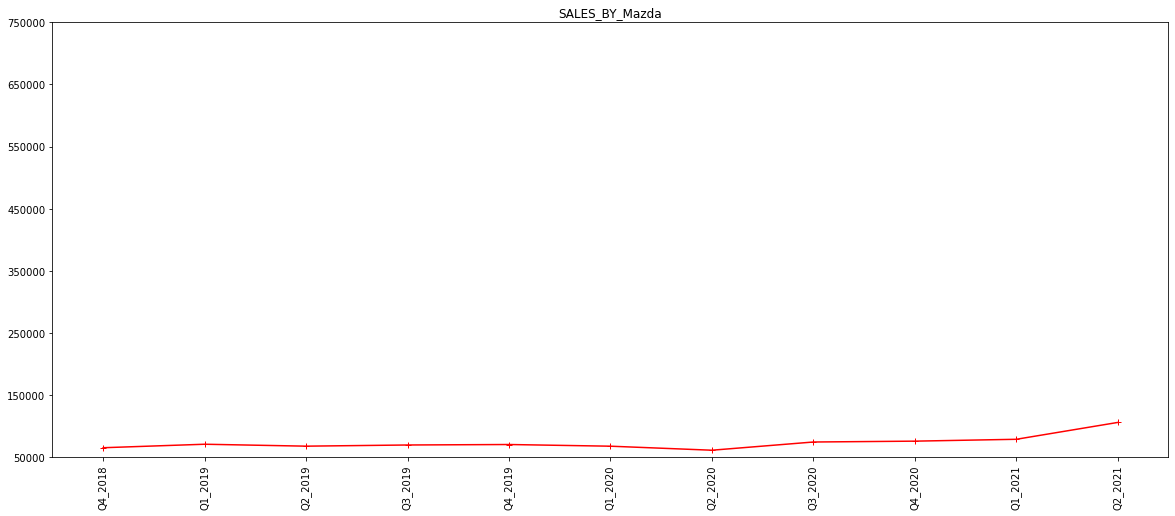

<Figure size 7200x7200 with 0 Axes>

In [18]:
fig = plt.figure(figsize=(20,8))
x_axis=np.arange(len(Auto_manufacturer_index.columns))
Mazda_axis=Auto_manufacturer_index.iloc[7].tolist()
plt.plot(x_axis, Mazda_axis, marker="+", color="red")

tick_locations=[value for value in x_axis]
plt.xticks(tick_locations, ["Q4_2018","Q1_2019", "Q2_2019", "Q3_2019", "Q4_2019", "Q1_2020",
                           "Q2_2020", "Q3_2020", "Q4_2020", "Q1_2021", "Q2_2021"] , rotation='vertical')


plt.yticks(np.arange(50000,800000, step=100000))
plt.title(f"SALES_BY_Mazda")


plt.figure(figsize=(100, 100))

<Figure size 7200x7200 with 0 Axes>

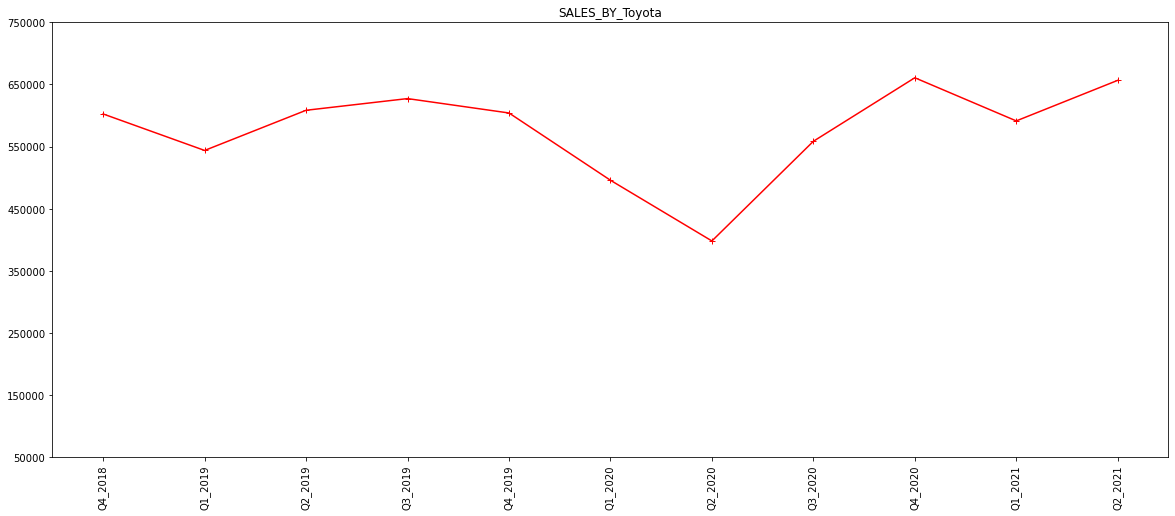

<Figure size 7200x7200 with 0 Axes>

In [19]:
fig = plt.figure(figsize=(20,8))
x_axis=np.arange(len(Auto_manufacturer_index.columns))
Toyota_axis=Auto_manufacturer_index.iloc[12].tolist()
plt.plot(x_axis, Toyota_axis, marker="+", color="red")

tick_locations=[value for value in x_axis]
plt.xticks(tick_locations, ["Q4_2018","Q1_2019", "Q2_2019", "Q3_2019", "Q4_2019", "Q1_2020",
                           "Q2_2020", "Q3_2020", "Q4_2020", "Q1_2021", "Q2_2021"] , rotation='vertical')


plt.yticks(np.arange(50000,800000, step=100000))
plt.title(f"SALES_BY_Toyota")


plt.figure(figsize=(100, 100))

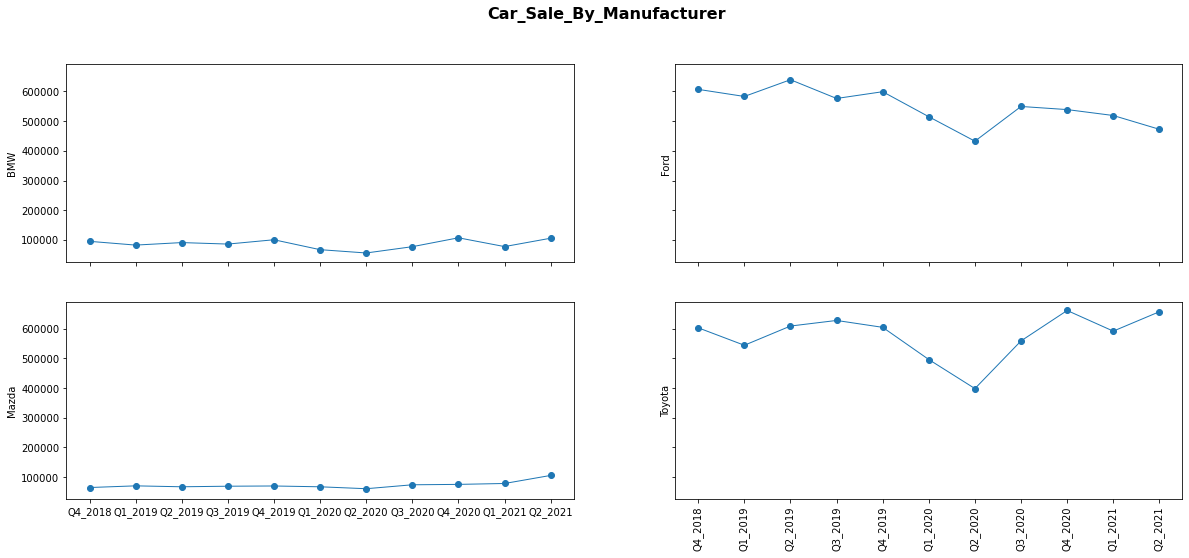

In [22]:
# fig, (ax1, ax2, ax3, ax4)=plt.subplots(4, sharex=True)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(20,8))
fig.suptitle("Car_Sale_By_Manufacturer", fontsize=16, fontweight="bold")
x_axis=["Q4_2018","Q1_2019", "Q2_2019", "Q3_2019", "Q4_2019", "Q1_2020",
                           "Q2_2020", "Q3_2020", "Q4_2020", "Q1_2021", "Q2_2021"]
# ax1.set_xlim(["Q4_2018","Q1_2019", "Q2_2019", "Q3_2019", "Q4_2019", "Q1_2020",
#                            "Q2_2020", "Q3_2020", "Q4_2020", "Q1_2021", "Q2_2021"])
ax1.plot(x_axis, BMW_axis, linewidth=1, marker="o")
ax1.set_ylabel("BMW")

ax2.plot(x_axis, Ford_axis, linewidth=1, marker="o")
ax2.set_ylabel("Ford")

ax3.plot(x_axis, Mazda_axis, linewidth=1, marker="o")
ax3.set_ylabel("Mazda")

ax4.plot(x_axis, Toyota_axis, linewidth=1, marker="o")
ax4.set_ylabel("Toyota")

plt.xticks(rotation='vertical')

plt.show()

<Figure size 7200x7200 with 0 Axes>

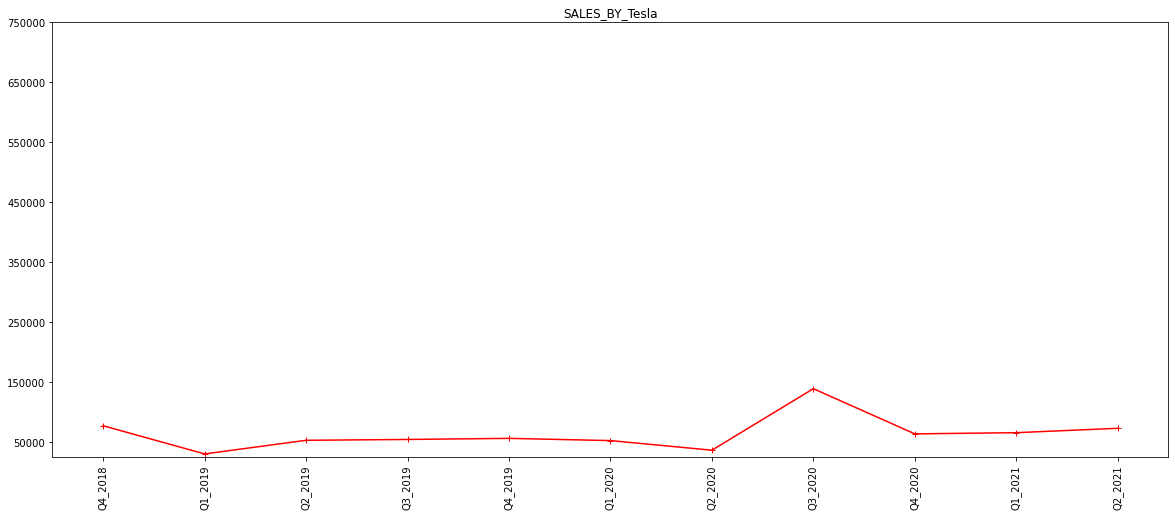

<Figure size 7200x7200 with 0 Axes>

In [24]:
fig = plt.figure(figsize=(20,8))
x_axis=np.arange(len(pick_car_df.columns))
y_axis=pick_car_df.iloc[0].tolist()
plt.plot(x_axis, y_axis, marker="+", color="red")

tick_locations=[value for value in x_axis]
plt.xticks(tick_locations, ["Q4_2018","Q1_2019", "Q2_2019", "Q3_2019", "Q4_2019", "Q1_2020",
                           "Q2_2020", "Q3_2020", "Q4_2020", "Q1_2021", "Q2_2021"] , rotation='vertical')


plt.yticks(np.arange(50000,800000, step=100000))
plt.title(f"SALES_BY_{Manufacturer_id}")


plt.figure(figsize=(100, 100))

In [25]:
# Auto_manufacturer.plot(kind="bar", figsize=(30,10))

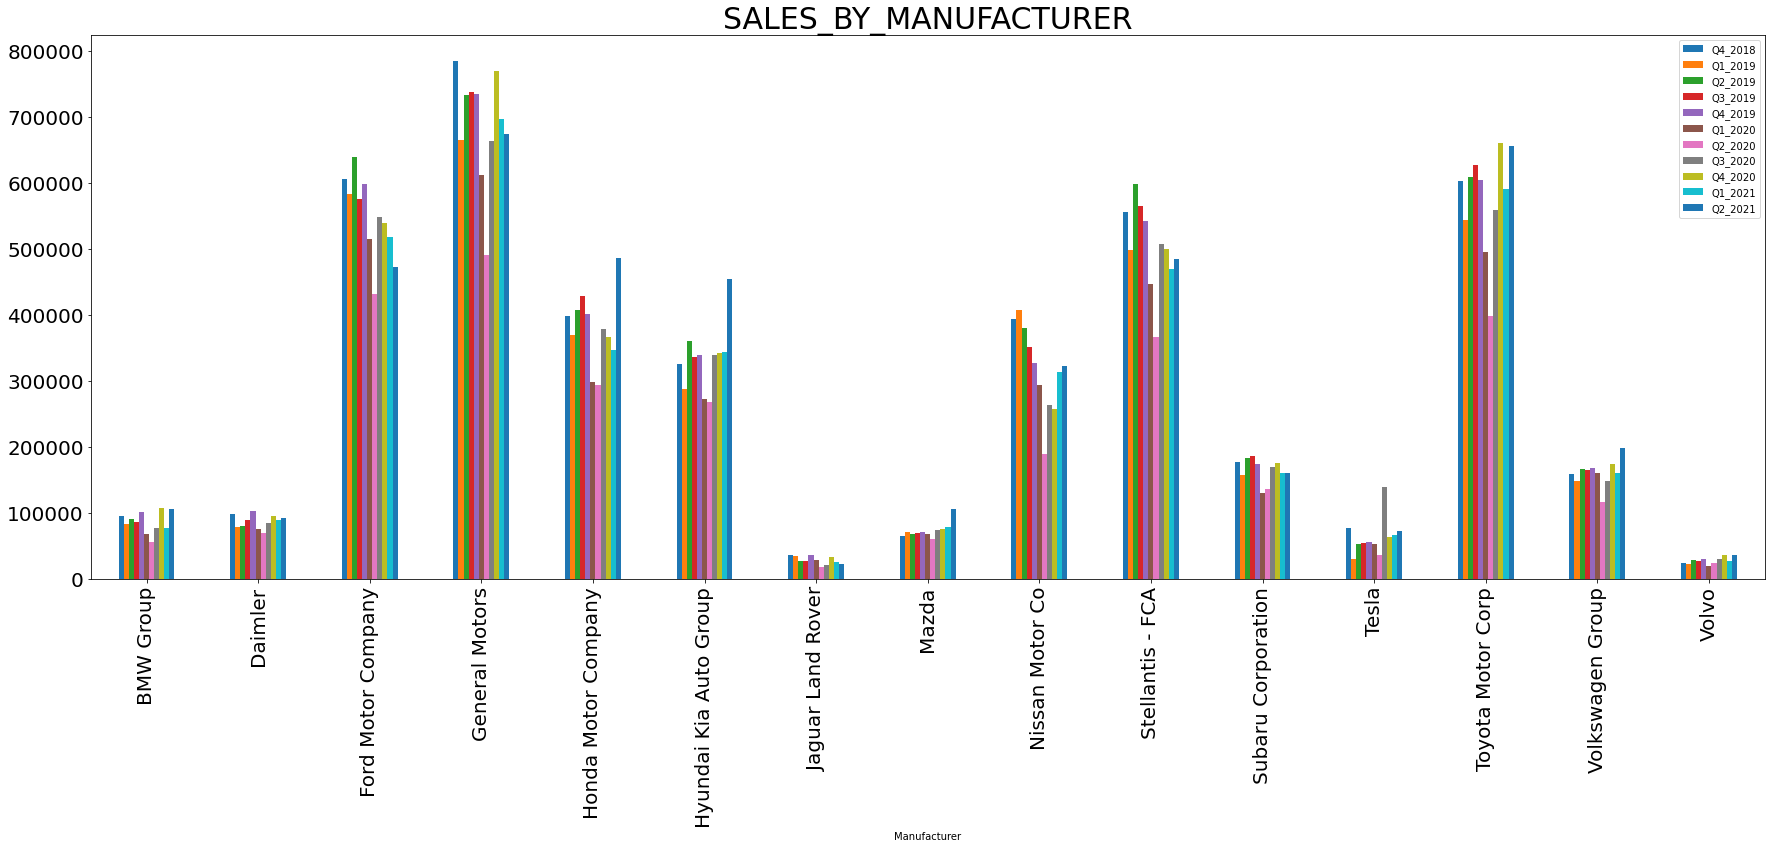

<Figure size 432x288 with 0 Axes>

In [26]:
Auto_manufacturer_index.plot(kind='bar', figsize=(30,10))
plt.title("SALES_BY_MANUFACTURER", fontsize=30)

plt.xticks(fontsize=20, rotation='vertical')
plt.yticks(fontsize=20)
plt.show()
plt.tight_layout()

In [27]:
Auto_sale_state_df.head()

,State,2020,2019,2018
0,California,107.7,114.9,120.1
1,Texas,91.1,94.2,92.0
2,Florida,83.0,80.5,80.4
3,New York,59.9,62.2,61.3
4,Michigan,38.2,40.0,39.3


In [28]:
Auto_sale_state_df=Auto_sale_state_df[["State","2018","2019","2020"]]
Auto_sale_state_df.head()

,State,2018,2019,2020
0,California,120.1,114.9,107.7
1,Texas,92.0,94.2,91.1
2,Florida,80.4,80.5,83.0
3,New York,61.3,62.2,59.9
4,Michigan,39.3,40.0,38.2


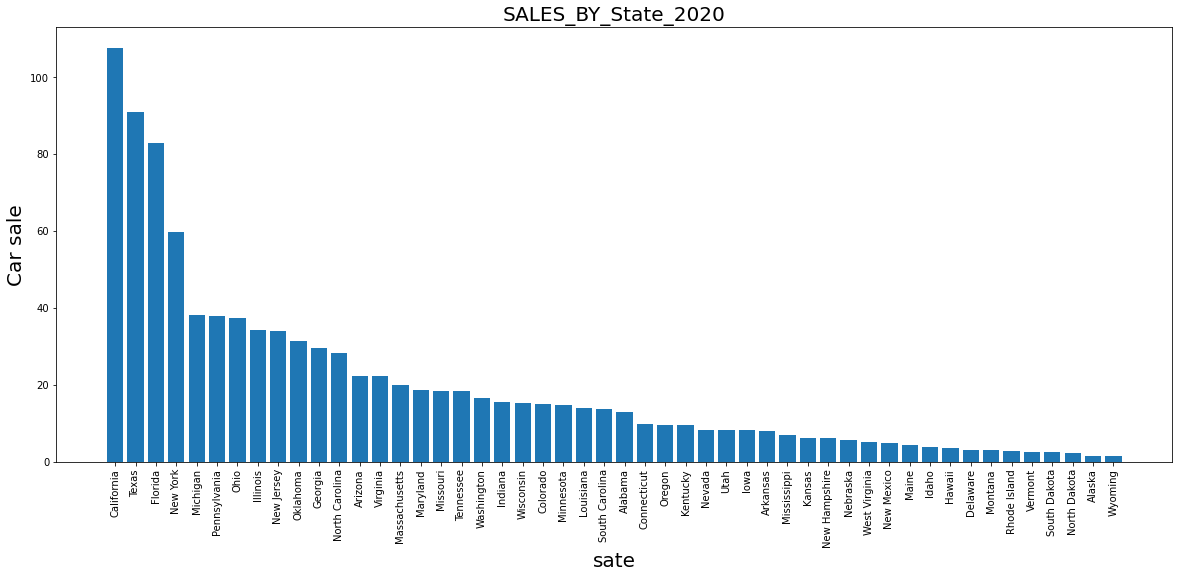

In [29]:
plt.figure(figsize=(20,8))
state=[state for state in Auto_sale_state_df["State"]]
plt.bar(state, Auto_sale_state_df["2020"])

plt.title("SALES_BY_State_2020", fontsize=20)
plt.xticks(rotation = 90)
plt.xlabel("sate", fontsize=20)
plt.ylabel("Car sale", fontsize=20)

plt.savefig("SALES_BY_State_2020.png")
plt.show()

In [30]:
State_index_df=Auto_sale_state_df.set_index("State")
State_index_df.head()

,2018,2019,2020
State,,,
California,120.1,114.9,107.7
Texas,92.0,94.2,91.1
Florida,80.4,80.5,83.0
New York,61.3,62.2,59.9
Michigan,39.3,40.0,38.2


In [31]:
Top_5_state_df=State_index_df.iloc[0:5,:]

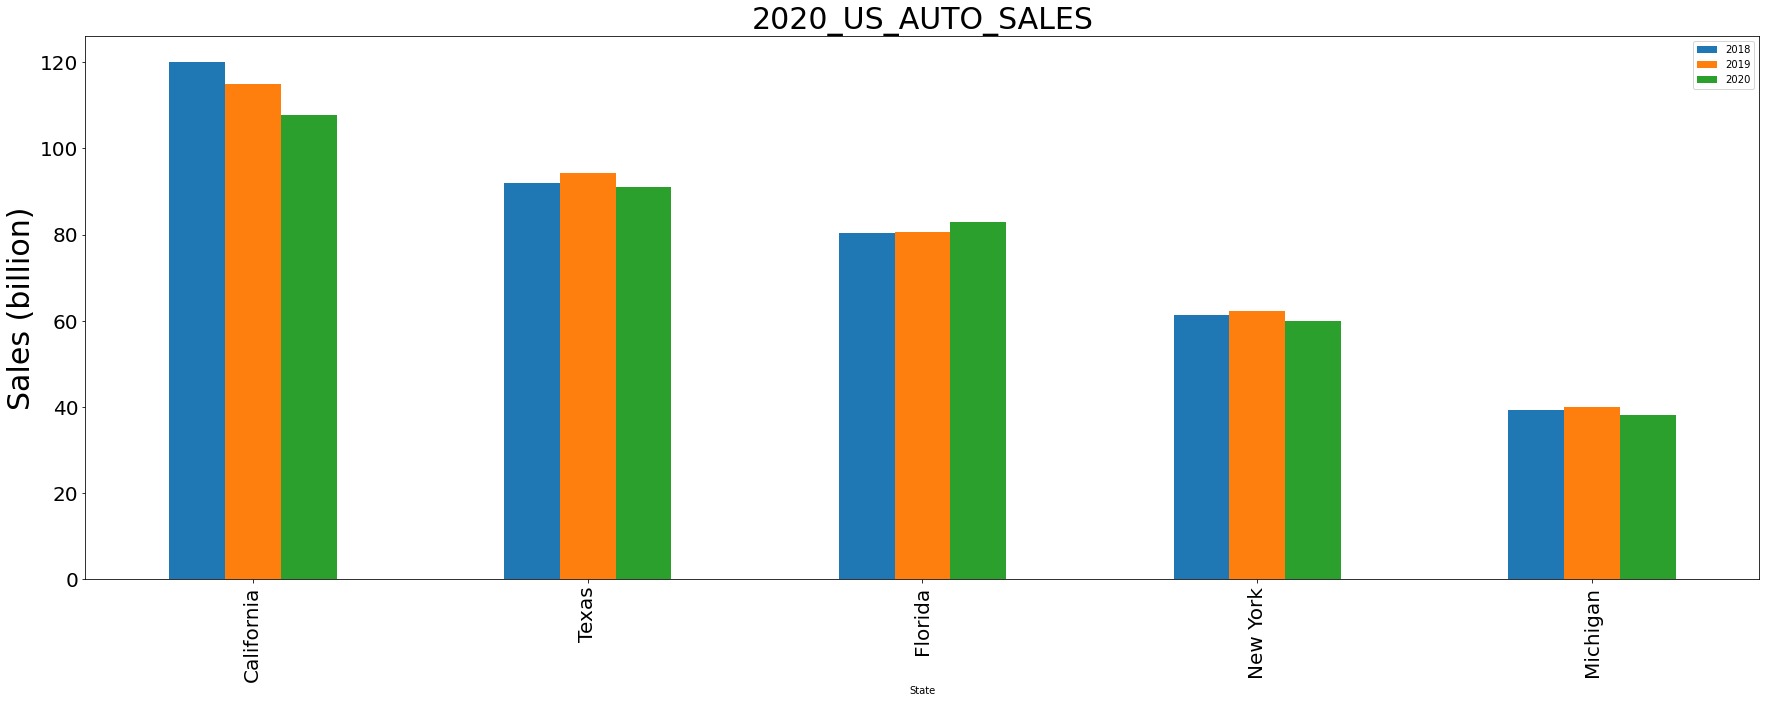

<Figure size 432x288 with 0 Axes>

In [32]:
Top_5_state_df.plot(kind='bar', figsize=(30,10))
plt.title("2020_US_AUTO_SALES", fontsize=30)
plt.ylabel("Sales (billion)", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()
plt.tight_layout()

In [36]:
State_id=str(input("Which Stae are you lookinf for?"))

Which Stae are you lookinf for?Florida


In [37]:
state_index = Auto_sale_state_df.loc[Auto_sale_state_df["State"] == State_id]
pick_State_df=state_index.set_index("State")
pick_State_df

,2018,2019,2020
State,,,
Florida,80.4,80.5,83.0


<Figure size 7200x7200 with 0 Axes>

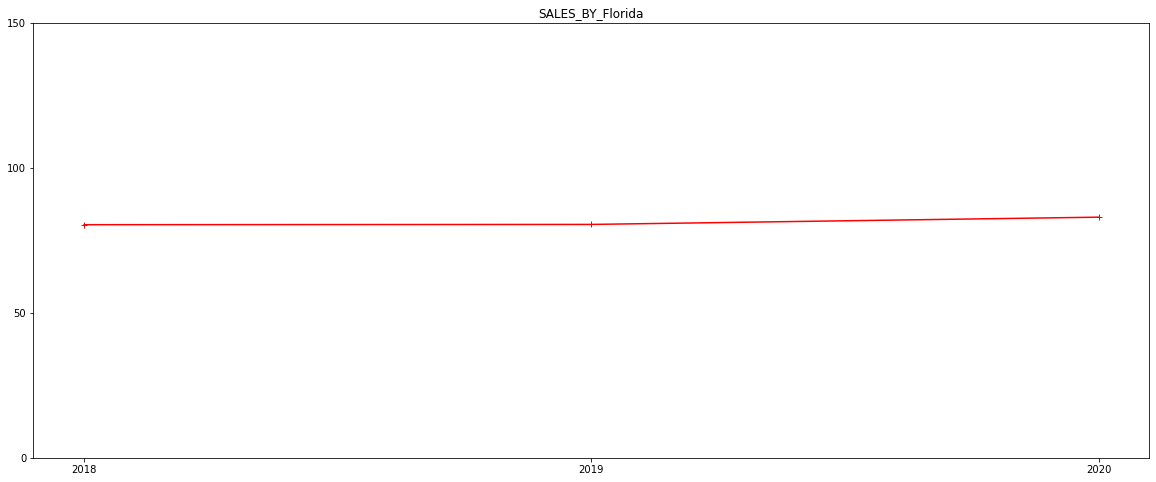

<Figure size 7200x7200 with 0 Axes>

In [38]:
fig = plt.figure(figsize=(20,8))
x_axis=np.arange(len(pick_State_df.columns))
y_axis=pick_State_df.iloc[0].tolist()
plt.plot(x_axis, y_axis, marker="+", color="red")

tick_locations=[value for value in x_axis]
plt.xticks(tick_locations, ["2018","2019", "2020"])


plt.yticks(np.arange(0,200, step=50))
plt.title(f"SALES_BY_{State_id}")


plt.figure(figsize=(100, 100))

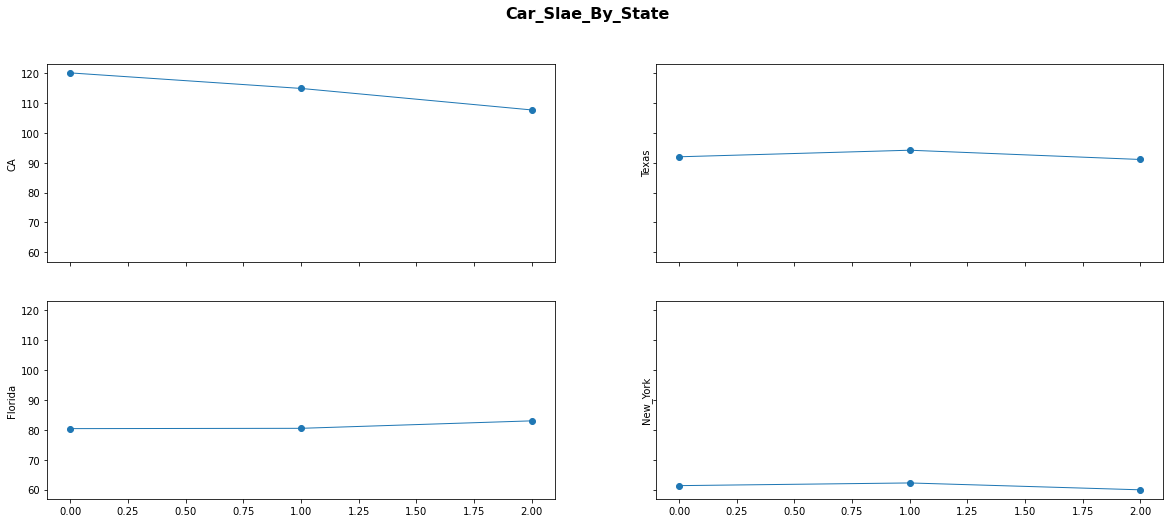

In [39]:
x_axis=np.arange(len(pick_State_df.columns))
CA_axis=State_index_df.iloc[0].tolist()
Texas_axis=State_index_df.iloc[1].tolist()
Florida_axis=State_index_df.iloc[2].tolist()
NY_axis=State_index_df.iloc[3].tolist()


# fig, (ax1, ax2, ax3, ax4)=plt.subplots(4, sharex=True)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True,figsize=(20,8))
fig.suptitle("Car_Slae_By_State", fontsize=16, fontweight="bold")


ax1.plot(x_axis, CA_axis, linewidth=1, marker="o")
ax1.set_ylabel("CA")

ax2.plot(x_axis, Texas_axis, linewidth=1, marker="o")
ax2.set_ylabel("Texas")

ax3.plot(x_axis, Florida_axis, linewidth=1, marker="o")
ax3.set_ylabel("Florida")

ax4.plot(x_axis, NY_axis, linewidth=1, marker="o")
ax4.set_ylabel("New_York")


plt.show()

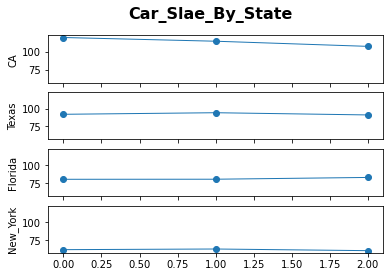

In [40]:
x_axis=np.arange(len(pick_State_df.columns))
CA_axis=State_index_df.iloc[0].tolist()
Texas_axis=State_index_df.iloc[1].tolist()
Florida_axis=State_index_df.iloc[2].tolist()
NY_axis=State_index_df.iloc[3].tolist()


# fig, (ax1, ax2, ax3, ax4)=plt.subplots(4, sharex=True)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, sharey=True)
fig.suptitle("Car_Slae_By_State", fontsize=16, fontweight="bold")


ax1.plot(x_axis, CA_axis, linewidth=1, marker="o")
ax1.set_ylabel("CA")

ax2.plot(x_axis, Texas_axis, linewidth=1, marker="o")
ax2.set_ylabel("Texas")

ax3.plot(x_axis, Florida_axis, linewidth=1, marker="o")
ax3.set_ylabel("Florida")

ax4.plot(x_axis, NY_axis, linewidth=1, marker="o")
ax4.set_ylabel("New_York")


plt.show()

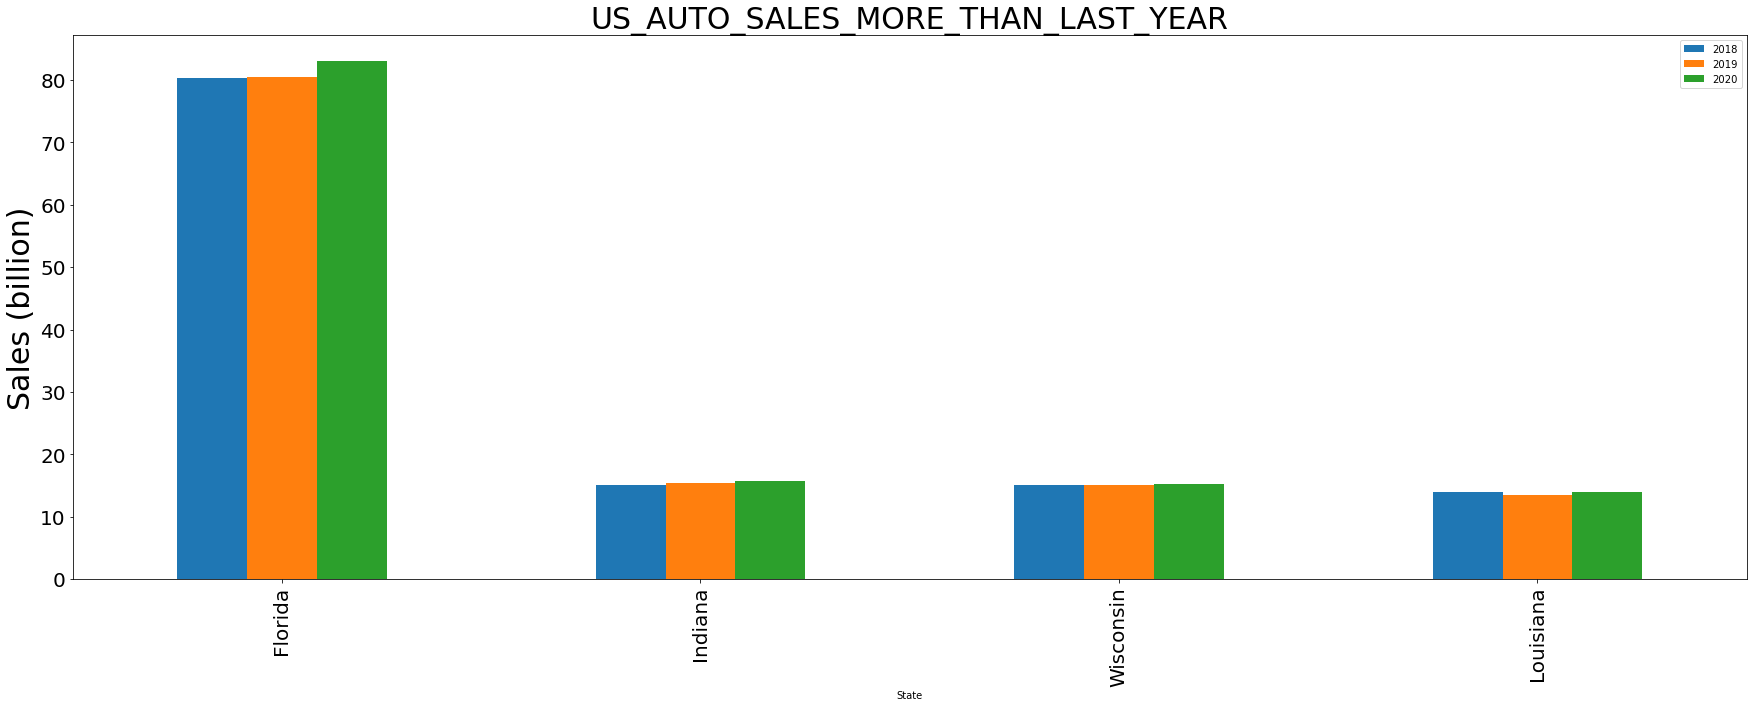

<Figure size 432x288 with 0 Axes>

In [44]:
Grow_in_2020_df=State_index_df.loc[State_index_df["2020"] > State_index_df["2019"]]
Grow_in_2020_df.iloc[0:4,:].plot(kind='bar', figsize=(30,10))
plt.title("US_AUTO_SALES_MORE_THAN_LAST_YEAR", fontsize=30)
plt.ylabel("Sales (billion)", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()
plt.tight_layout()

In [45]:
Grow_in_2020_df

,2018,2019,2020
State,,,
Florida,80.40,80.5,83.0
Indiana,15.00,15.4,15.7
Wisconsin,15.00,15.1,15.3
Louisiana,13.88,13.5,13.9
South Carolina,10.96,13.5,13.8
Alabama,12.16,12.7,13.1
Kentucky,9.69,9.0,9.5
Iowa,9.44,7.8,8.2
Arkansas,7.97,7.9,8.1


In [46]:
State_Higher_sale_in_2020=Grow_in_2020_df.reset_index()
State_Higher_sale_in_2020.to_csv("csv/State_Higher_sale_in_2020.csv", index=False, header=True)

In [47]:
USA_cars_df.head(20)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
5,5,5700,dodge,mpv,2018,clean vehicle,45561.0,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left
6,6,7300,chevrolet,pk,2010,clean vehicle,149050.0,black,1gcsksea1az121133,167753872,georgia,usa,22 hours left
7,7,13350,gmc,door,2017,clean vehicle,23525.0,gray,1gks2gkc3hr326762,167692494,california,usa,20 hours left
8,8,14600,chevrolet,malibu,2018,clean vehicle,9371.0,silver,1g1zd5st5jf191860,167763267,florida,usa,22 hours left
9,9,5250,ford,mpv,2017,clean vehicle,63418.0,black,2fmpk3j92hbc12542,167656121,texas,usa,2 days left


In [48]:
Drop_USA_cars_df=USA_cars_df[["brand", "model", "year", "state","mileage","price"]]
Drop_USA_cars_df.dtypes

brand       object
model       object
year         int64
state       object
mileage    float64
price        int64
dtype: object

In [49]:
Drop_USA_cars_df.head()

,brand,model,year,state,mileage,price
0,toyota,cruiser,2008,new jersey,274117.0,6300
1,ford,se,2011,tennessee,190552.0,2899
2,dodge,mpv,2018,georgia,39590.0,5350
3,ford,door,2014,virginia,64146.0,25000
4,chevrolet,1500,2018,florida,6654.0,27700


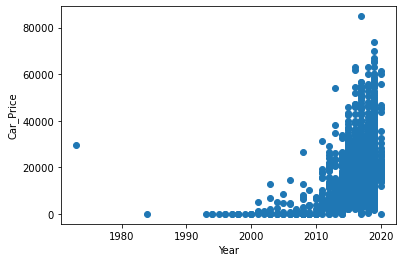

In [50]:
plt.scatter(Drop_USA_cars_df.iloc[:,2],Drop_USA_cars_df.iloc[:,-1])
plt.xlabel('Year')
plt.ylabel('Car_Price')
plt.show()

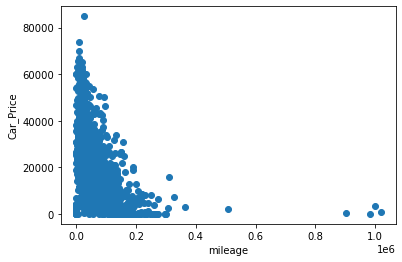

In [51]:
plt.scatter(Drop_USA_cars_df.iloc[:,-2],Drop_USA_cars_df.iloc[:,-1])
plt.xlabel('mileage')
plt.ylabel('Car_Price')
plt.show()

In [52]:
import sklearn.datasets as dta
all_corr=Drop_USA_cars_df.corr()
all_corr

,year,mileage,price
year,1.000000,-0.594686,0.418274
mileage,-0.594686,1.000000,-0.400838
price,0.418274,-0.400838,1.000000


In [53]:
new_df=all_corr.replace(1, 0)
new_df.max()
new_df.min()

year      -0.594686
mileage   -0.594686
price     -0.400838
dtype: float64

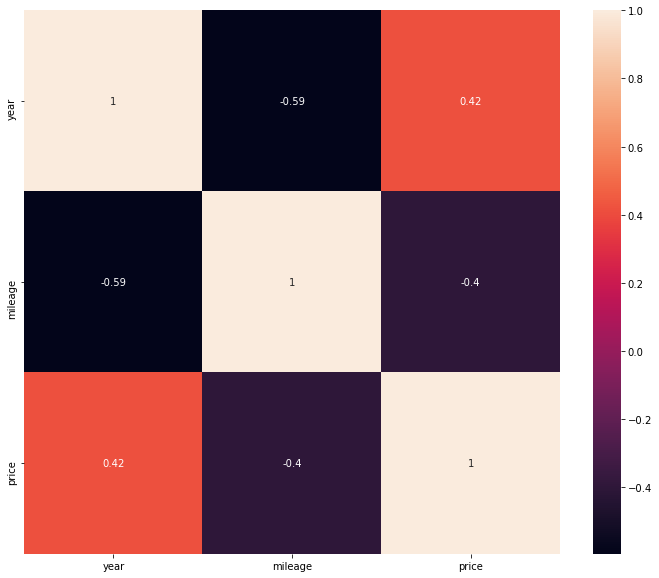

In [54]:
import seaborn as sns
corr= Drop_USA_cars_df.corr()
f, ax =plt.subplots(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.savefig('heatmap_corr_ymp')

In [55]:
USA_cars_inventory_df.head()

,DATE,AUINSA
0,1993-01-01,1315.7
1,1993-02-01,1387.4
2,1993-03-01,1420.9
3,1993-04-01,1426.3
4,1993-05-01,1432.0


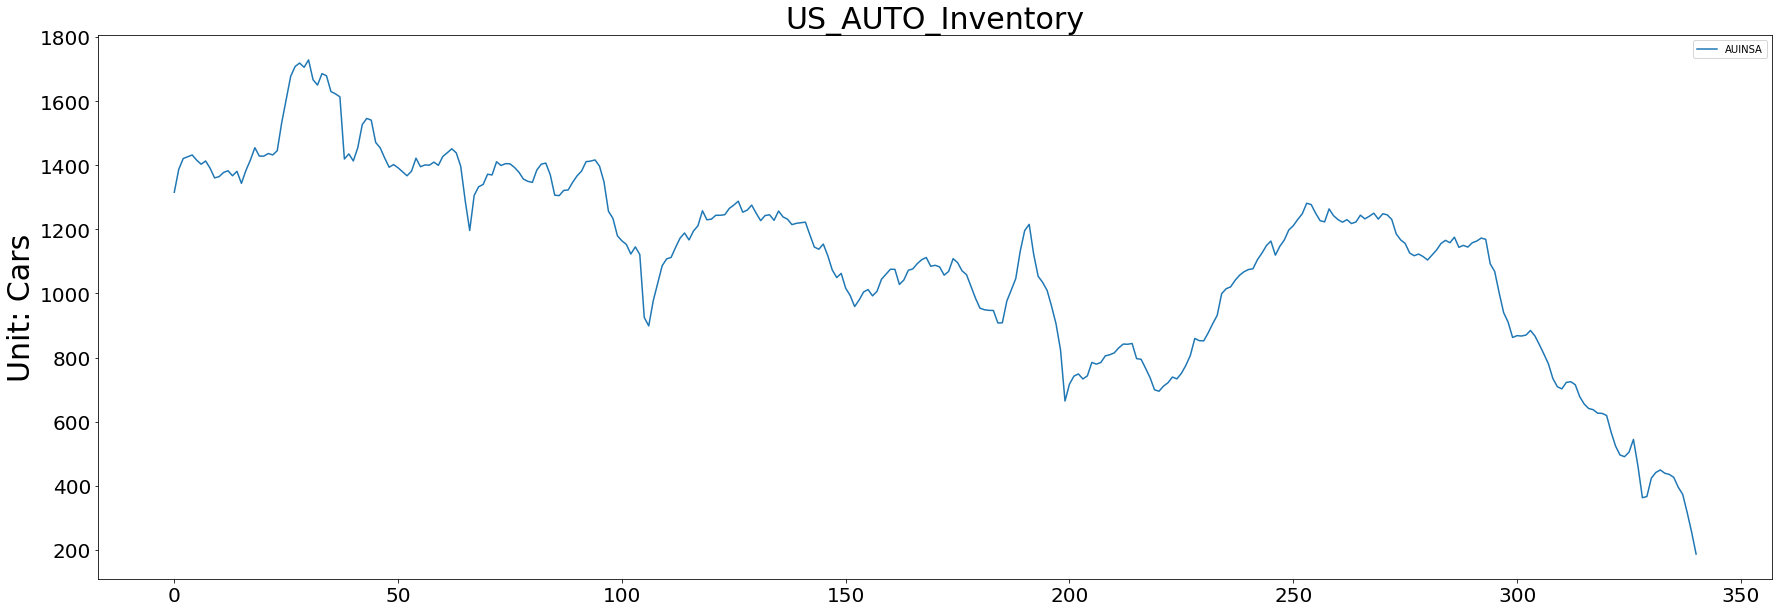

<Figure size 432x288 with 0 Axes>

In [56]:
USA_cars_inventory_df.plot(kind='line', figsize=(30,10))
plt.title("US_AUTO_Inventory", fontsize=30)
plt.ylabel("Unit: Cars", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()
plt.tight_layout()

In [57]:
USA_cars_inventory_df["DATE"]=USA_cars_inventory_df["DATE"].str.slice(0,4)

In [58]:
USA_cars_inventory_df.head()

,DATE,AUINSA
0,1993,1315.7
1,1993,1387.4
2,1993,1420.9
3,1993,1426.3
4,1993,1432.0


In [59]:
Groupby_Date_cars_inventory_df=USA_cars_inventory_df.groupby("DATE")
USA_cars_inventory_year_df=pd.DataFrame({
    "Year":["1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004",
           "2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017",
           "2018","2019","2020","2021"],
    "Inventory":Groupby_Date_cars_inventory_df["AUINSA"].sum()
    
})

In [60]:
USA_cars_inventory_year_df.head()

,Year,Inventory
DATE,,
1993,1993,16707.3
1994,1994,16899.1
1995,1995,19987.1
1996,1996,17920.3
1997,1997,16743.4


In [61]:
USA_cars_inventory_year_df.reset_index().drop(columns=["DATE"]).head()

,Year,Inventory
0,1993,16707.3
1,1994,16899.1
2,1995,19987.1
3,1996,17920.3
4,1997,16743.4


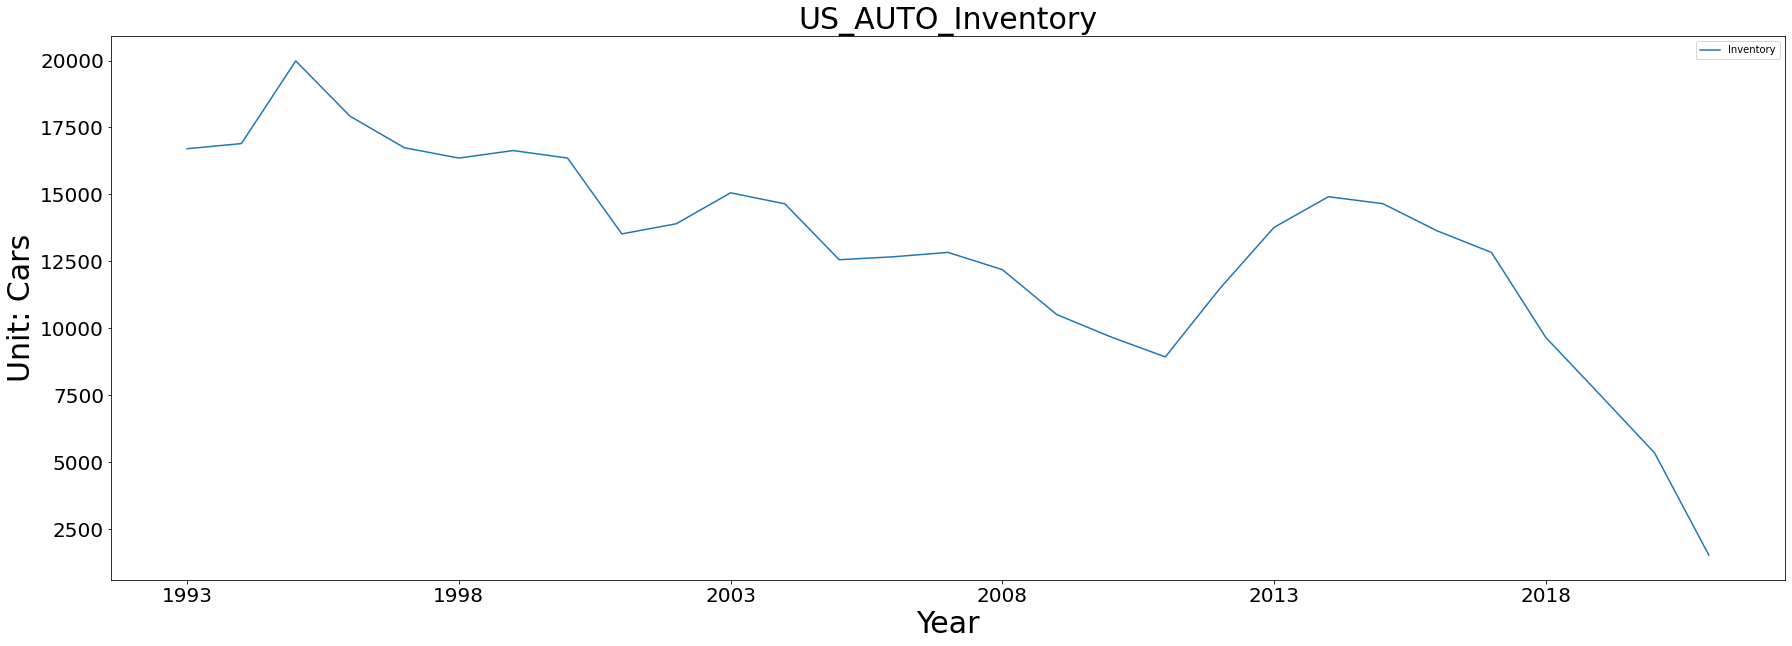

<Figure size 432x288 with 0 Axes>

In [62]:
USA_cars_inventory_year_df.plot(kind='line', figsize=(30,10))
years=[year for year in USA_cars_inventory_year_df["Year"]]

plt.title("US_AUTO_Inventory", fontsize=30)
plt.xlabel("Year", fontsize=30)
plt.ylabel("Unit: Cars", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()
plt.tight_layout()



In [63]:
Cars_factors_df.head()

,Year,automobile production(Number of Vehicles),Semiconductor industry revenue(in billion U.S dollars),USA_cars_inventory(Number of Vehicles),Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,2000.0,58000000.0,NaN,16359.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001.0,56000000.0,NaN,13526.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002.0,59000000.0,NaN,13903.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003.0,61000000.0,NaN,15060.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004.0,65000000.0,NaN,14648.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
Clean_1=Cars_factors_df.drop(columns=['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9',
                             'Unnamed: 10','Unnamed: 11'])

In [65]:
Clean_2=Clean_1.drop([22,23,24,25,26,27,28])

In [66]:
Clean_2

,Year,automobile production(Number of Vehicles),Semiconductor industry revenue(in billion U.S dollars),USA_cars_inventory(Number of Vehicles)
0,2000.0,58000000.0,NaN,16359.1
1,2001.0,56000000.0,NaN,13526.0
2,2002.0,59000000.0,NaN,13903.8
3,2003.0,61000000.0,NaN,15060.3
4,2004.0,65000000.0,NaN,14648.3
5,2005.0,67000000.0,NaN,12560.7
6,2006.0,69000000.0,NaN,12671.8
7,2007.0,73000000.0,NaN,12834.3
8,2008.0,71000000.0,NaN,12191.8
9,2009.0,62000000.0,NaN,10515.2


In [67]:
Clean_3=Clean_2.drop([0,1,2,3,4,5,6,7,8,9,10,11,21])
Clean_3.head()

,Year,automobile production(Number of Vehicles),Semiconductor industry revenue(in billion U.S dollars),USA_cars_inventory(Number of Vehicles)
12,2012.0,84000000.0,2.999100e+11,11479.1
13,2013.0,87000000.0,3.154300e+11,13769.4
14,2014.0,90000000.0,3.403300e+11,14914.3
15,2015.0,91000000.0,3.349300e+11,14656.5
16,2016.0,95000000.0,3.435100e+11,13640.5


In [68]:
all_corr_factors=Clean_3.corr()
all_corr_factors

,Year,automobile production(Number of Vehicles),Semiconductor industry revenue(in billion U.S dollars),USA_cars_inventory(Number of Vehicles)
Year,1.000000,0.079774,0.918181,-0.755937
automobile production(Number of Vehicles),0.079774,1.000000,0.137158,0.410523
Semiconductor industry revenue(in billion U.S dollars),0.918181,0.137158,1.000000,-0.735828
USA_cars_inventory(Number of Vehicles),-0.755937,0.410523,-0.735828,1.000000


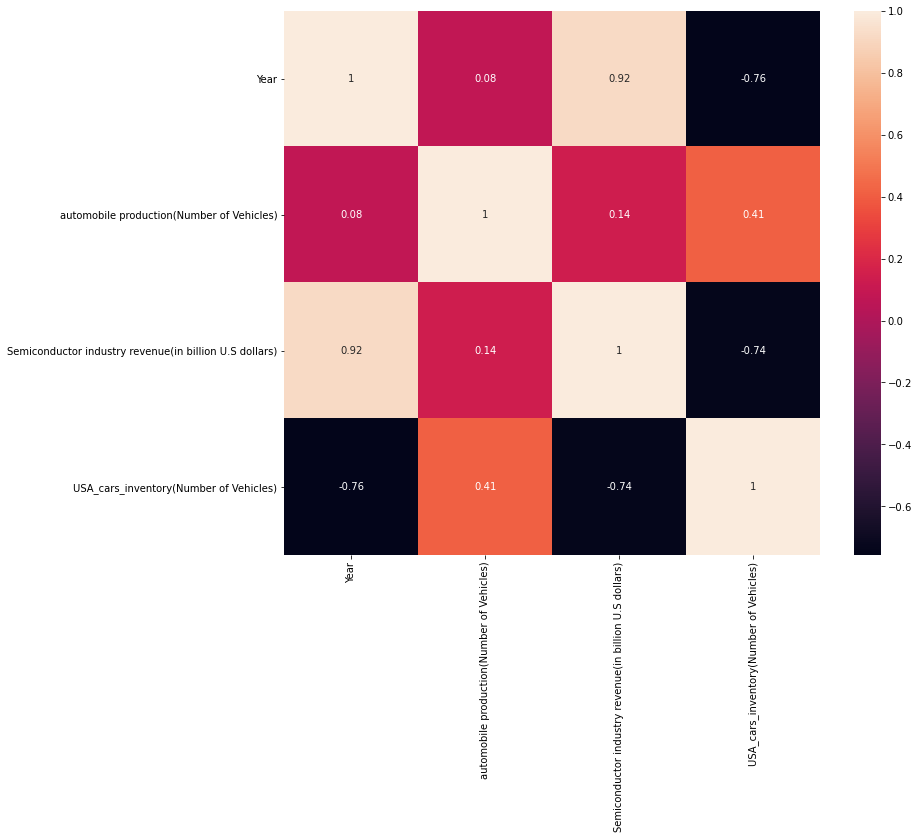

In [69]:
corr_factors= Clean_3.corr()
f, ax =plt.subplots(figsize=(12,10))
sns.heatmap(corr_factors, annot=True)
plt.savefig('heatmap_corr_factors')

In [70]:
groupby_year=Drop_USA_cars_df.groupby("year")

In [71]:
ymp_df=pd.DataFrame({
    "mileage":groupby_year["mileage"].mean(),
    "price":groupby_year["price"].mean()   
})
ymp_df=ymp_df.reset_index()

In [72]:
ymp_df=ymp_df.rename(columns={
    "year":"Year",
    "mileage":"Mileage",
    "price":"price"})
ymp_df

,Year,Mileage,price
0,1973,46226.000000,29800.000000
1,1984,41577.000000,25.000000
2,1993,0.000000,0.000000
3,1994,103081.000000,12.500000
4,1995,274706.000000,0.000000
5,1996,274724.000000,0.000000
6,1997,175104.500000,0.000000
7,1998,219218.500000,6.250000
8,1999,226972.000000,25.000000
9,2000,169508.750000,43.750000


In [73]:
Factors_df=pd.merge(ymp_df, Clean_3, how="left", on=["Year", "Year"])
Factors_df=Factors_df.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
Factors_df

,Year,Mileage,price,automobile production(Number of Vehicles),Semiconductor industry revenue(in billion U.S dollars),USA_cars_inventory(Number of Vehicles)
21,2012,134914.444444,7657.333333,84000000.0,2.999100e+11,11479.1
22,2013,118611.662791,8764.244186,87000000.0,3.154300e+11,13769.4
23,2014,96668.807692,11817.355769,90000000.0,3.403300e+11,14914.3
24,2015,70572.994898,15563.168367,91000000.0,3.349300e+11,14656.5
25,2016,57542.541872,18280.911330,95000000.0,3.435100e+11,13640.5
26,2017,48433.047745,18596.440318,97000000.0,4.217200e+11,12834.2
27,2018,34278.215190,19058.339241,97000000.0,4.761500e+11,9657.5
28,2019,24053.810538,24025.404709,92000000.0,4.223400e+11,7511.8
29,2020,10633.104167,25083.854167,78000000.0,4.662400e+11,5347.8


In [82]:
all_corr_factors=all_corr_factors.rename(columns={
    "Year":"Year",
    "Mileage":"Mileage",
    "price":"price",
    "automobile production(Number of Vehicles)":"Auto_production",
    "Semiconductor industry revenue(in billion U.S dollars)": "Semiconductor",
    "USA_cars_inventory(Number of Vehicles)":"Inventory"
})
all_corr_factors.head()

,Year,Mileage,price,Auto_production,Semiconductor,Inventory
Year,1.000000,-0.998416,0.999117,-0.044002,0.995713,-0.956580
Mileage,-0.998416,1.000000,-0.999023,-0.006952,-0.993056,0.938761
price,0.999117,-0.999023,1.000000,-0.030555,0.991408,-0.949084
automobile production(Number of Vehicles),-0.044002,-0.006952,-0.030555,1.000000,-0.028616,0.312902
Semiconductor industry revenue(in billion U.S dollars),0.995713,-0.993056,0.991408,-0.028616,1.000000,-0.955327


In [83]:
all_corr=all_corr_factors.corr()
all_corr

,Year,Mileage,price,Auto_production,Semiconductor,Inventory
Year,1.000000,-0.999781,0.999982,-0.316467,0.999972,-0.993774
Mileage,-0.999781,1.000000,-0.999884,0.296600,-0.999865,0.991227
price,0.999982,-0.999884,1.000000,-0.311089,0.999975,-0.993114
Auto_production,-0.316467,0.296600,-0.311089,1.000000,-0.311069,0.420041
Semiconductor,0.999972,-0.999865,0.999975,-0.311069,1.000000,-0.993141
Inventory,-0.993774,0.991227,-0.993114,0.420041,-0.993141,1.000000


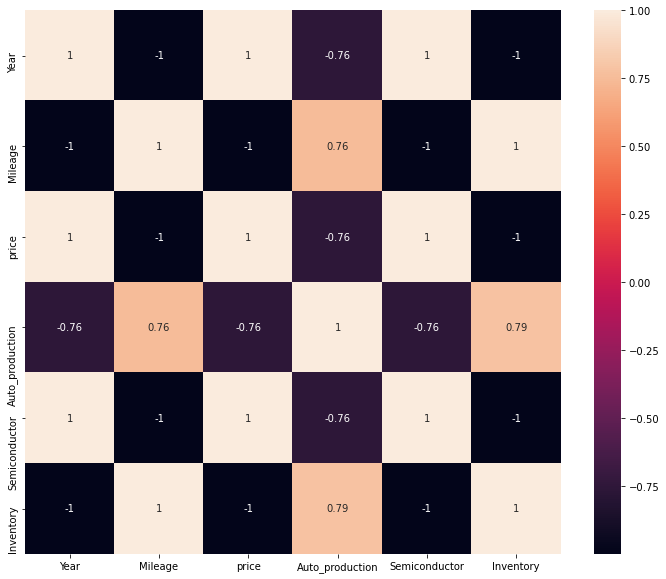

In [85]:
corr_factors= all_corr.corr()
f, ax =plt.subplots(figsize=(12,10))
sns.heatmap(corr_factors, annot=True)
plt.savefig('heatmap_corr_factors')